In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from glob import glob
import random
import seaborn as sns
sns.set(style='darkgrid')
sns.set_style('whitegrid')

# Load the labels
labels = pd.read_csv('C:/Users/antuh/Documents/Apu_Thesis/Code_File/Data/sample_labels.csv')

# Specify the path to the images
PATH = os.path.abspath(os.path.join('C:/Users/antuh/Documents/Apu_Thesis/Code_File/Data/sample'))
SOURCE_IMAGES = os.path.join(PATH, "sample", "images")
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))



,Image Index,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No Findings
0,00000013_005.png,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
1,00000013_026.png,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00000017_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,00000030_001.png,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,00000032_001.png,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


### Details Data Set Types

In [12]:
print(labels.dtypes)

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                     object
Patient Gender                  object
View Position                   object
OriginalImageWidth               int64
OriginalImageHeight              int64
OriginalImagePixelSpacing_x    float64
OriginalImagePixelSpacing_y    float64
dtype: object


In [13]:
print(labels.shape)

(5606, 11)


In [14]:
labels.head(5)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


### Exploratory Data Analysis

### Check Missing Value


In [16]:
def missing_data(labels):
    total = labels.isnull().sum().sort_values(ascending = False)
    percent = (labels.isnull().sum()/labels.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [17]:
missing_data(labels)

,Total,Percent
Image Index,0,0.0
Finding Labels,0,0.0
Follow-up #,0,0.0
Patient ID,0,0.0
Patient Age,0,0.0
Patient Gender,0,0.0
View Position,0,0.0
OriginalImageWidth,0,0.0
OriginalImageHeight,0,0.0
OriginalImagePixelSpacing_x,0,0.0


In [18]:
def missing_data(labels):
    total = labels.isnull().sum().sort_values(ascending=False)
    percent = (labels.isnull().sum() / labels.isnull().count() * 100).sort_values(ascending=False)
    missing_data_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data_df.index, y=missing_data_df['Percent'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Percentage of Missing Data')
    plt.ylabel('Percentage')
    plt.show()



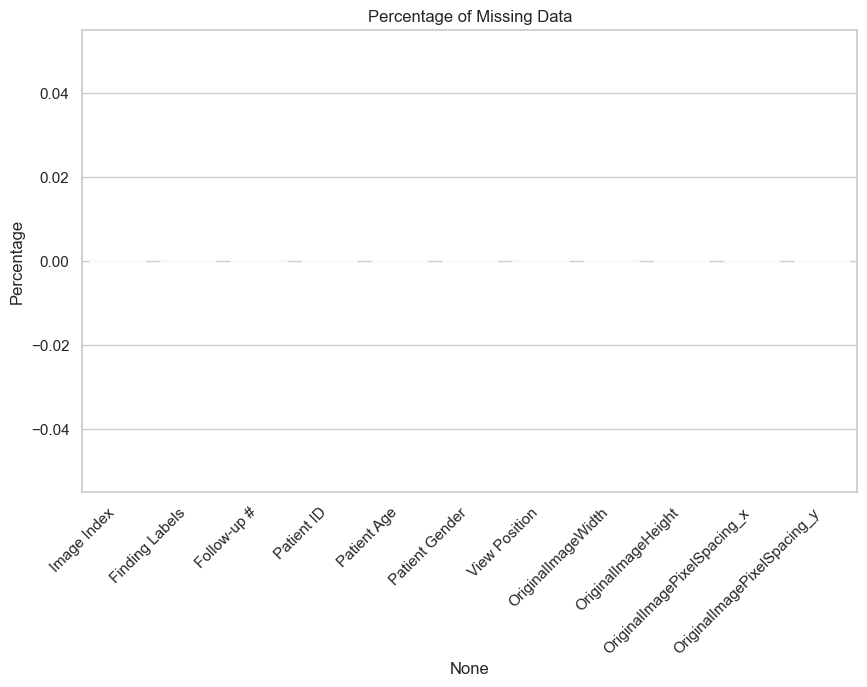

In [19]:
missing_data(labels)

<Axes: xlabel='Patient Gender'>

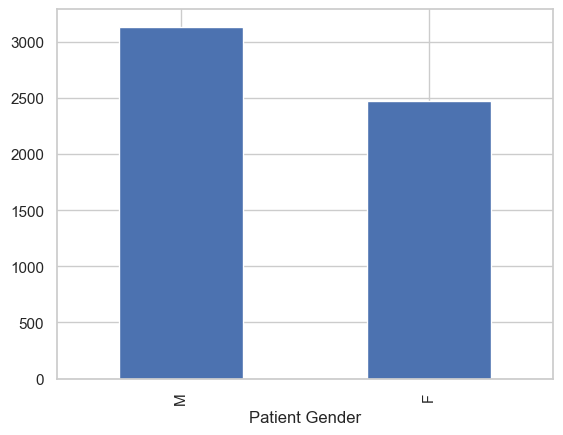

In [20]:
labels['Patient Gender'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

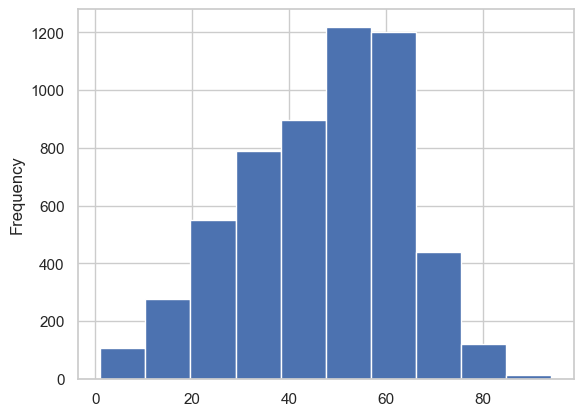

In [11]:
labels['Patient Age'].apply(lambda x : int(x[1:3])).plot.hist()

<Axes: xlabel='View Position'>

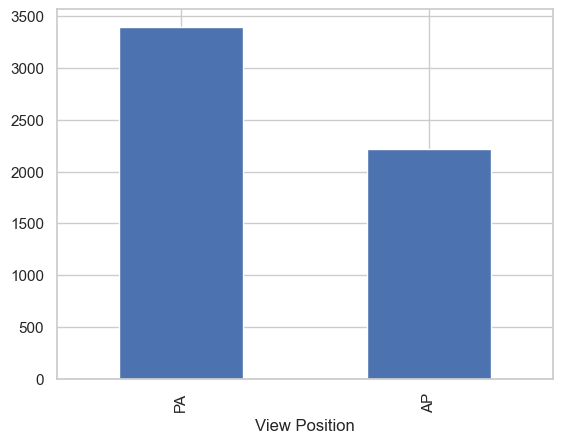

In [12]:
labels['View Position'].value_counts().plot.bar()

<Axes: >

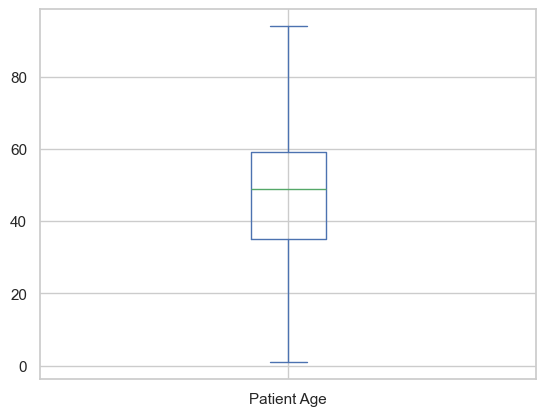

In [13]:
labels['Patient Age'].apply(lambda x : int(x[1:3])).plot.box()


In [26]:
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    labels[pathology] = labels['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
    
labels['No Findings'] = labels['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

<Axes: >

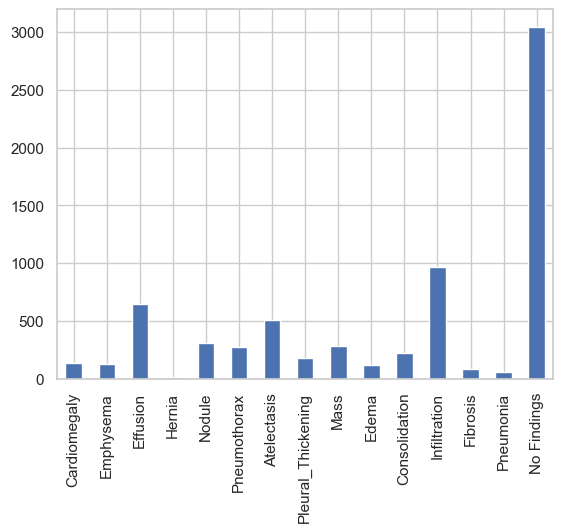

In [22]:
labels = labels.drop(list(labels.iloc[:,1:11].columns.values),axis = 1)
labels.iloc[:,1:].sum().plot.bar()

<Axes: >

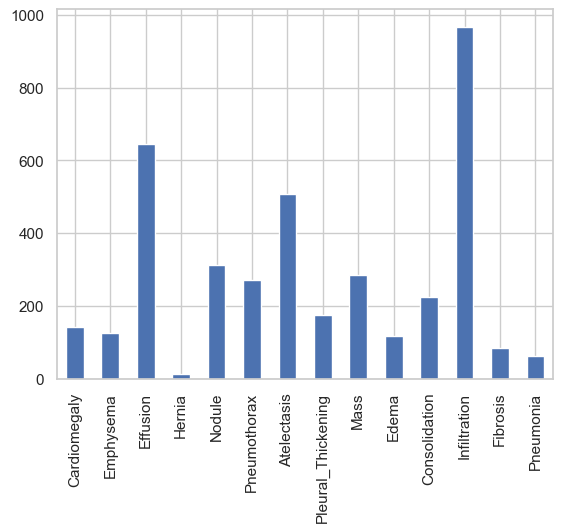

In [5]:
labels = labels.drop(['No Findings'],axis = 1)
labels.iloc[:,1:].sum().plot.bar()

<Axes: >

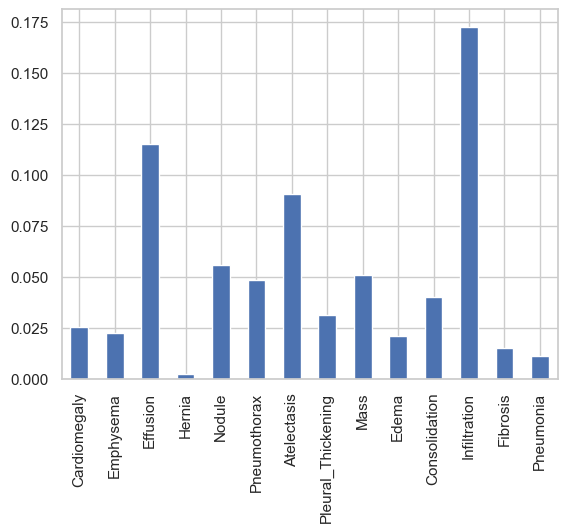

In [6]:
labels.iloc[:,1:].mean().plot.bar()

C:\Users\antuh\AppData\Local\Temp\ipykernel_10892\2947022368.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(labels[feature].dropna(),color=color, kde=True,bins=100)


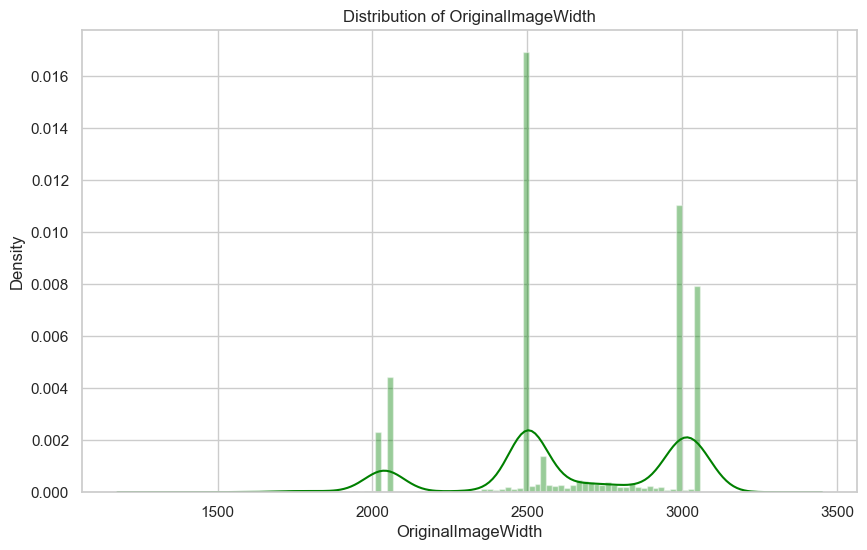

In [17]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(labels[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = labels.loc[labels['Finding Labels'] != 0]
    t0 = labels.loc[labels['Finding Labels'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(6,3*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="Finding Labels = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="Finding Labels = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()
plot_distribution('OriginalImageWidth','green')

C:\Users\antuh\AppData\Local\Temp\ipykernel_10892\2947022368.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(labels[feature].dropna(),color=color, kde=True,bins=100)


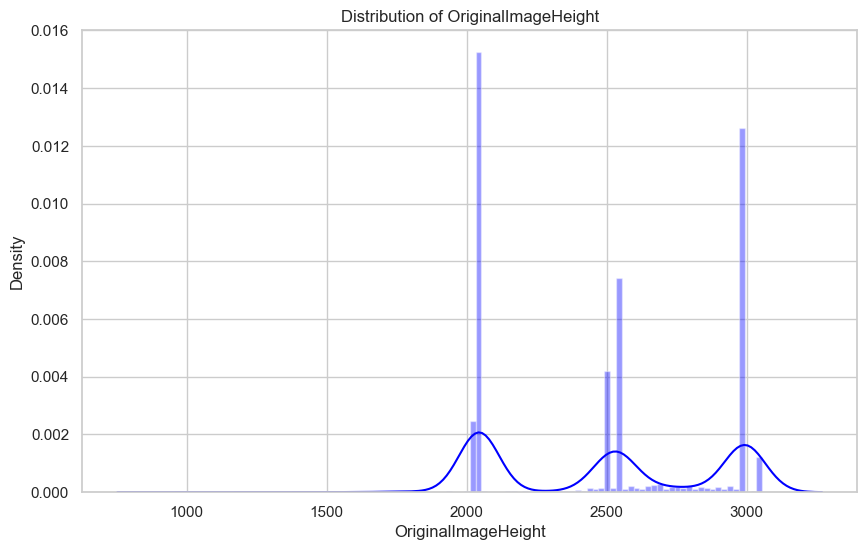

In [18]:
plot_distribution('OriginalImageHeight','blue')

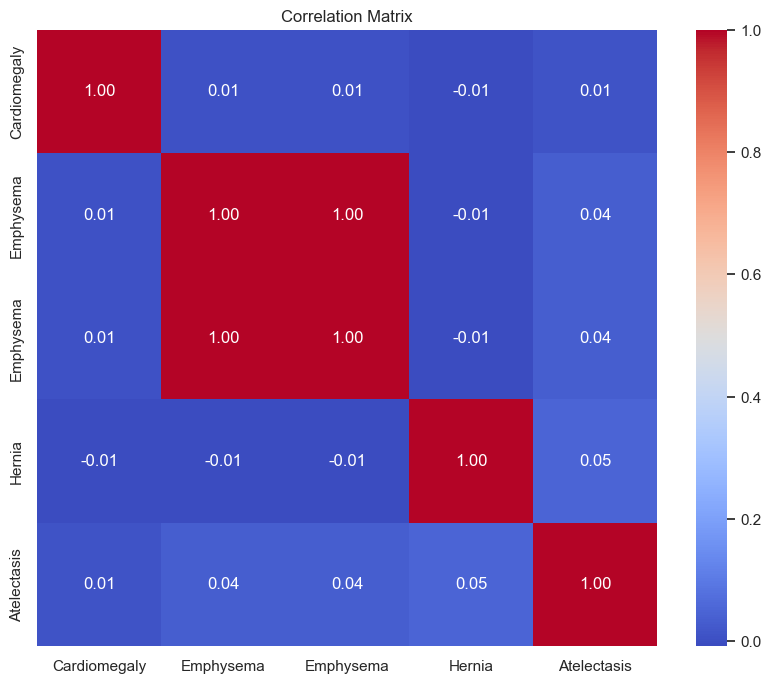

In [23]:
finding = ['Cardiomegaly', 'Emphysema', 'Emphysema', 'Hernia', 'Atelectasis']
corr_matrix = labels[finding].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


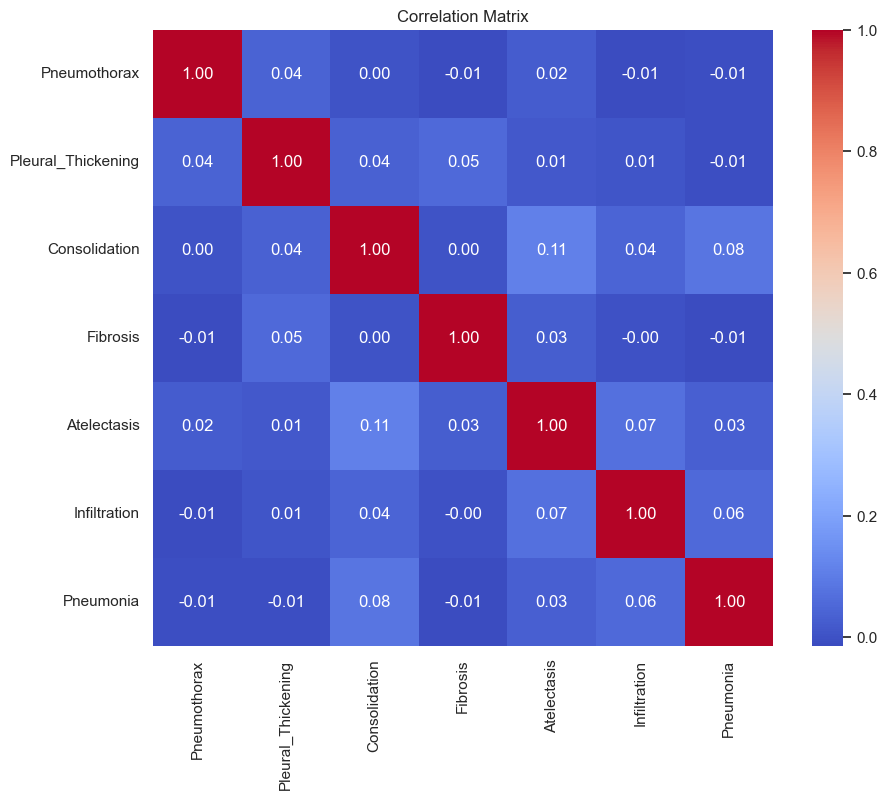

In [26]:
finding = ['Pneumothorax', 'Pleural_Thickening', 'Consolidation', 'Fibrosis', 'Atelectasis','Infiltration','Pneumonia']
corr_matrix = labels[finding].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [28]:
# Basic statistics of the dataset
print(labels.describe())

       Cardiomegaly    Emphysema     Effusion       Hernia       Nodule  \
count   5606.000000  5606.000000  5606.000000  5606.000000  5606.000000   
mean       0.025152     0.022654     0.114877     0.002319     0.055833   
std        0.156599     0.148812     0.318902     0.048104     0.229619   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        0.000000     0.000000     0.000000     0.000000     0.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

       Pneumothorax  Atelectasis  Pleural_Thickening         Mass  \
count   5606.000000  5606.000000         5606.000000  5606.000000   
mean       0.048341     0.090617            0.031395     0.050660   
std        0.214505     0.287090            0.174398     0.219322   
min        0.000000     0.000000            0.00

In [20]:
labels.head(5)

,Image Index,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000013_005.png,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1,00000013_026.png,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000017_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00000030_001.png,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,00000032_001.png,1,0,1,0,0,0,0,0,0,1,0,0,0,0


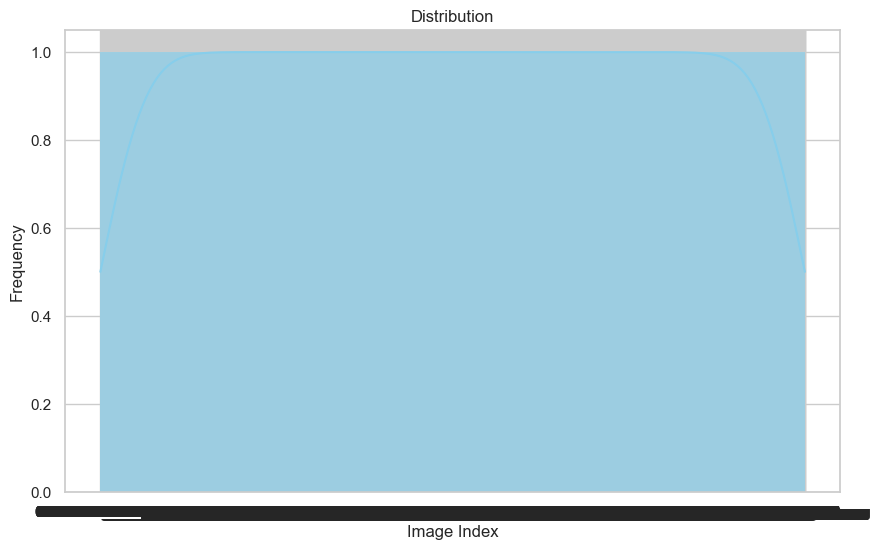

In [7]:
# Visualize the distribution of key features
plt.figure(figsize=(10, 6))
sns.histplot(labels['Image Index'], kde=True, color='skyblue', alpha=0.7)
plt.title('Distribution')
plt.xlabel('Image Index')
plt.ylabel('Frequency')
plt.show()

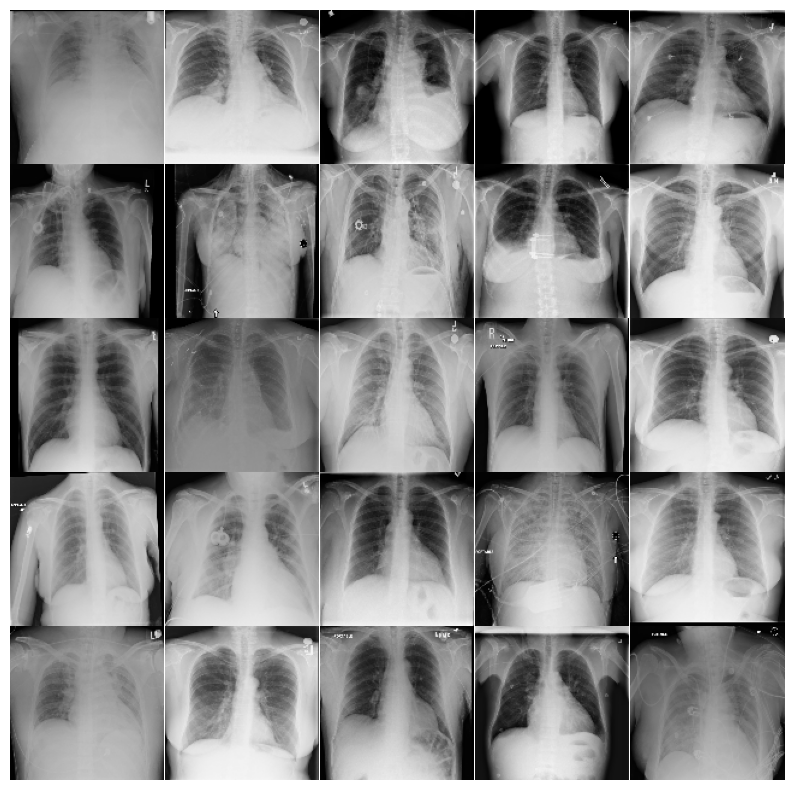

In [3]:
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in images[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

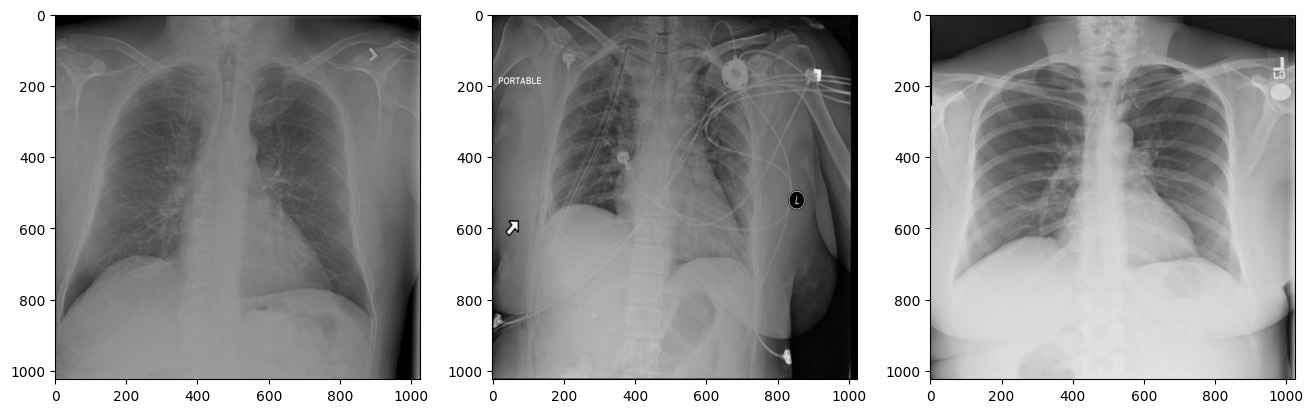

In [4]:
r = random.sample(images, 3)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))
plt.subplot(132)
plt.imshow(cv2.imread(r[1]))
plt.subplot(133)
plt.imshow(cv2.imread(r[2]));

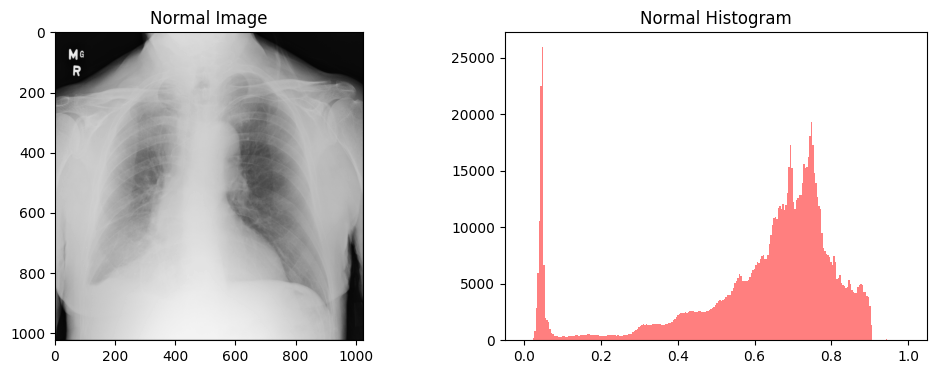

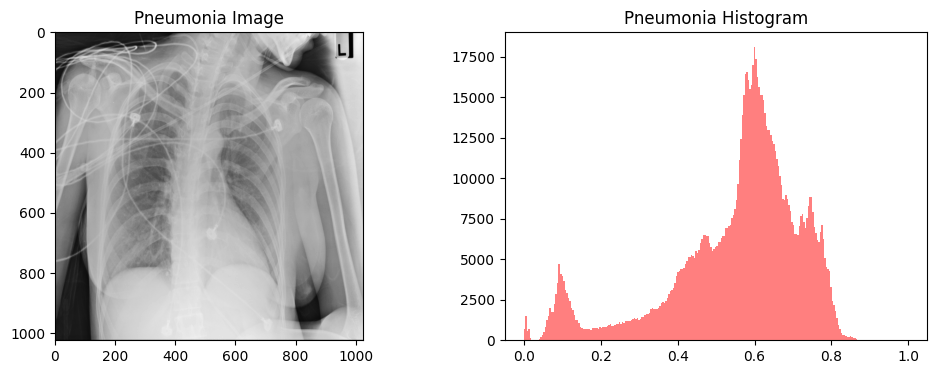

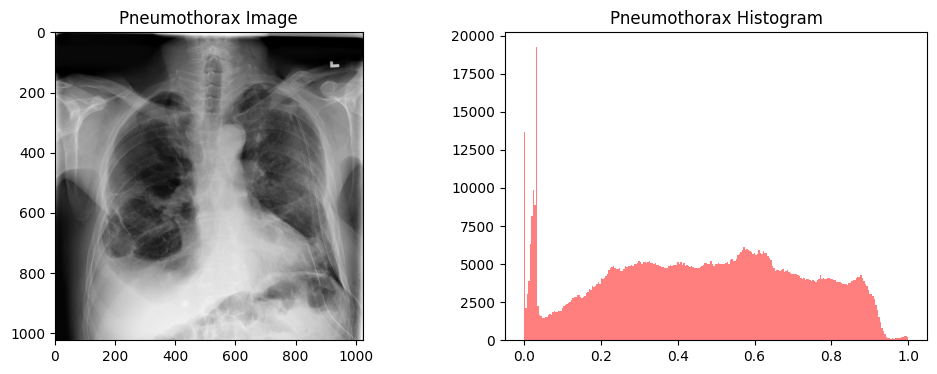

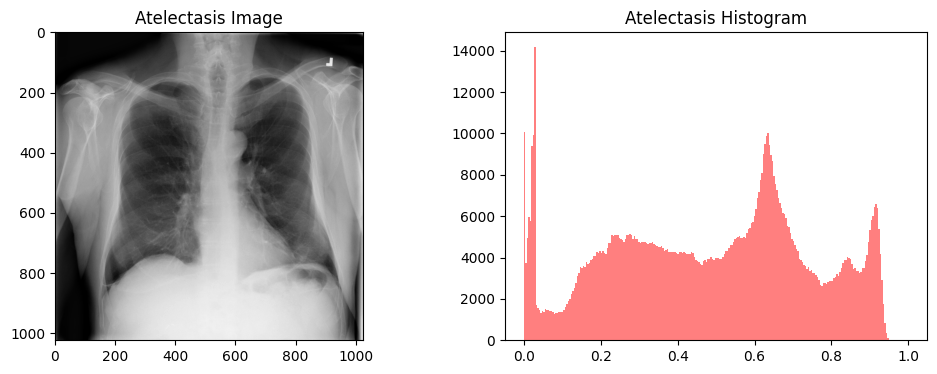

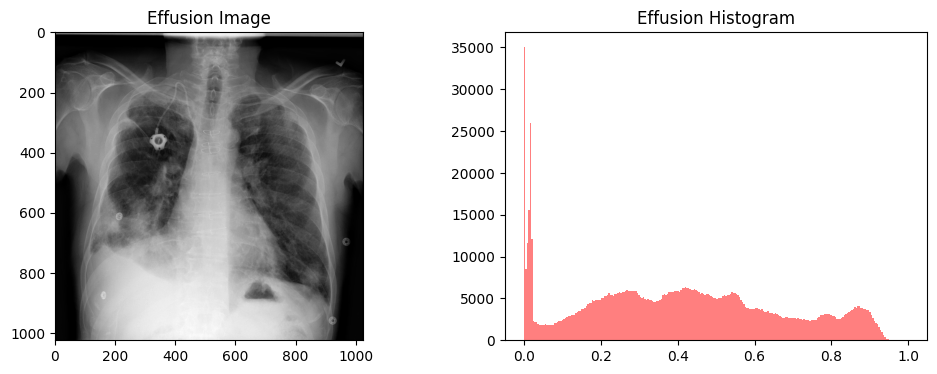

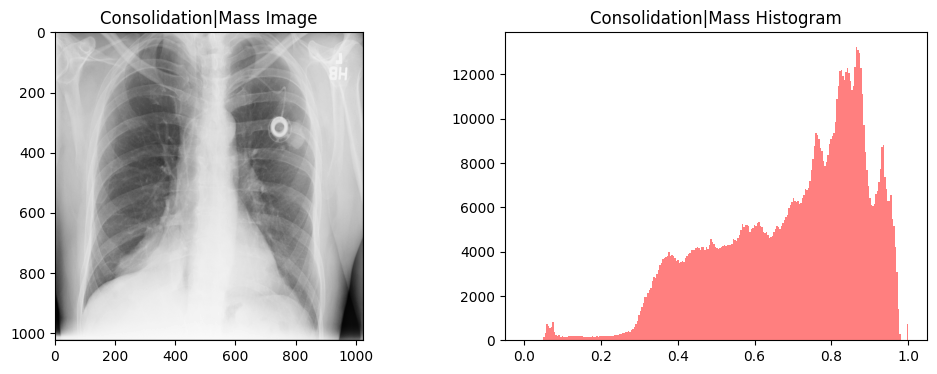

In [5]:
# Function to display an image and its histogram
def show_image_and_histogram(image, title):
    plt.figure(figsize=(12, 4))

    # Convert image to float
    image = np.array(image).astype(np.float32) / 255.0

    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{title} Image')

    # Display the histogram
    plt.subplot(1, 2, 2)
    plt.hist(image.flatten(), bins=256, range=[0, 1], color='r', alpha=0.5)
    plt.title(f'{title} Histogram')

    plt.show()

# Filter images based on class
normal_images = labels[labels['Finding Labels'] == 'No Finding']
pneumonia_images = labels[labels['Finding Labels'] == 'Pneumonia']
pneumothorax_images = labels[labels['Finding Labels'] == 'Pneumothorax']
atelectasis_images = labels[labels['Finding Labels'] == 'Atelectasis']
effusion_images = labels[labels['Finding Labels'] == 'Effusion']
consolidation_mass_images = labels[labels['Finding Labels'] == 'Consolidation|Mass']
# Load and display a sample image and histogram for each class
for i, (index, row) in enumerate(normal_images.head(1).iterrows()):
    image_name = row["Image Index"]
    image_path = os.path.join(SOURCE_IMAGES, image_name)
    
    # Load image using PIL
    normal_image = Image.open(image_path).convert("L")  # "L" mode for grayscale

    # Display the image and histogram
    show_image_and_histogram(normal_image, 'Normal')
    if i == 0:
        break

for i, (index, row) in enumerate(pneumonia_images.head(1).iterrows()):
    image_name = row["Image Index"]
    image_path = os.path.join(SOURCE_IMAGES, image_name)
    
    # Load image using PIL
    pneumonia_image = Image.open(image_path).convert("L")

    # Display the image and histogram
    show_image_and_histogram(pneumonia_image, 'Pneumonia')
    if i == 0:
        break

for i, (index, row) in enumerate(pneumothorax_images.head(1).iterrows()):
    image_name = row["Image Index"]
    image_path = os.path.join(SOURCE_IMAGES, image_name)
    
    # Load image using PIL
    pneumothorax_image = Image.open(image_path).convert("L")

    # Display the image and histogram
    show_image_and_histogram(pneumothorax_image, 'Pneumothorax')
    if i == 0:
        break
# Atelectasis
for i, (index, row) in enumerate(atelectasis_images.head(1).iterrows()):
    image_name = row["Image Index"]
    image_path = os.path.join(SOURCE_IMAGES, image_name)
    
    # Load image using PIL
    atelectasis_image = Image.open(image_path).convert("L")

    # Display the image and histogram
    show_image_and_histogram(atelectasis_image, 'Atelectasis')
    if i == 0:
        break
# Effusion
for i, (index, row) in enumerate(effusion_images.head(1).iterrows()):
    image_name = row["Image Index"]
    image_path = os.path.join(SOURCE_IMAGES, image_name)
    
    # Load image using PIL
    effusion_image = Image.open(image_path).convert("L")

    # Display the image and histogram
    show_image_and_histogram(effusion_image, 'Effusion')
    if i == 0:
        break
# ConsolidationMass
for i, (index, row) in enumerate(consolidation_mass_images.head(1).iterrows()):
    image_name = row["Image Index"]
    image_path = os.path.join(SOURCE_IMAGES, image_name)
    
    # Load image using PIL
    consolidation_mass_image = Image.open(image_path).convert("L")

    # Display the image and histogram
    show_image_and_histogram(consolidation_mass_image, 'Consolidation|Mass')
    if i == 0:
        break


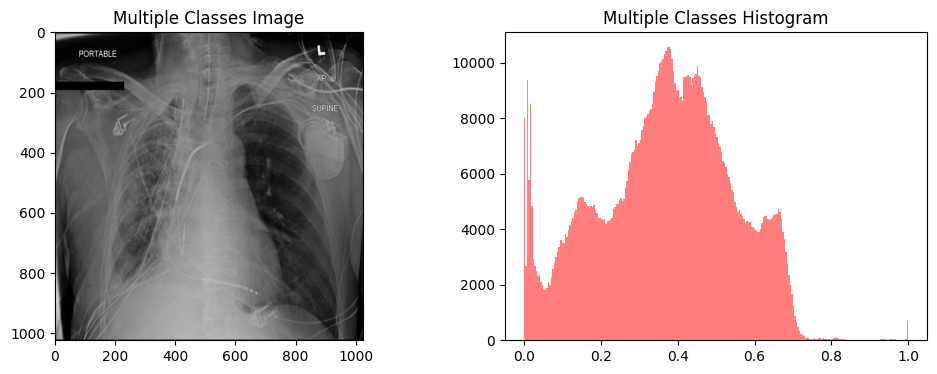

In [6]:
# Filter images based on multiple classes
target_classes = ['Cardiomegaly', 'Emphysema', 'Atelectasis', 'Consolidation', 'Mass', 'Effusion', 'Infiltration']
multi_class_images = labels[labels['Finding Labels'].str.contains('|'.join(target_classes))]

# Load and display a sample image and histogram for each class
for i, (index, row) in enumerate(multi_class_images.head(1).iterrows()):
    image_name = row["Image Index"]
    image_path = os.path.join(SOURCE_IMAGES, image_name)
    
    # Load image using PIL
    multi_class_image = Image.open(image_path).convert("L")  # "L" mode for grayscale

    # Display the image and histogram
    show_image_and_histogram(multi_class_image, 'Multiple Classes')
    if i == 0:
        break


## Data Preprocessing


### Data Imabalance Using Weight Loss

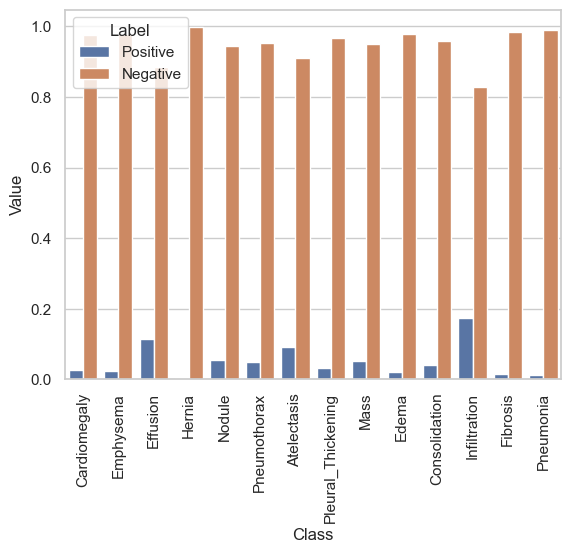

In [9]:
def compute_class_freqs(labels):
    labels = np.array(labels)
    N = labels.shape[0]
    positive_frequencies = np.sum(labels, axis=0) / N
    negative_frequencies = 1 - positive_frequencies
    return positive_frequencies, negative_frequencies

# Assuming 'labels' and 'pathology_list' are defined in your environment
freq_pos, freq_neg = compute_class_freqs(labels.iloc[:, 1:])

df_pos = pd.DataFrame({"Class": pathology_list, "Label": "Positive", "Value": freq_pos})
df_neg = pd.DataFrame({"Class": pathology_list, "Label": "Negative", "Value": freq_neg})

df = pd.concat([df_pos, df_neg], ignore_index=True)

plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label", data=df)
plt.show()


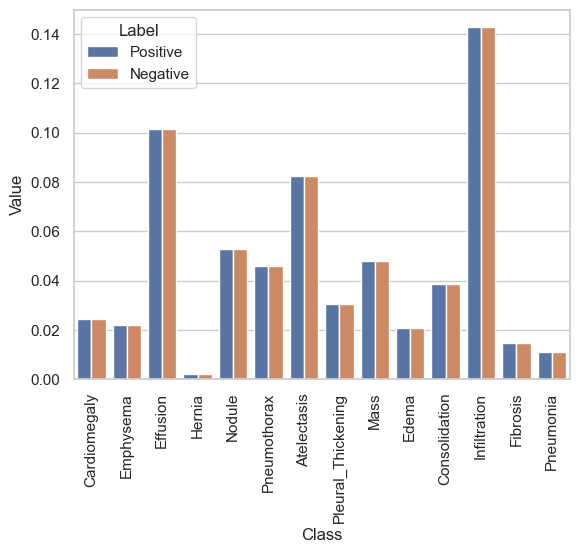

In [46]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights

df_pos = pd.DataFrame({"Class": pathology_list, "Label": "Positive", "Value": pos_contribution})
df_neg = pd.DataFrame({"Class": pathology_list, "Label": "Negative", "Value": neg_contribution})

df = pd.concat([df_pos, df_neg], ignore_index=True)

plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label", data=df)

# Set custom labels for the bars
plt.xticks(ticks=np.arange(len(pathology_list)), labels=pathology_list)

plt.show()

### Resize And Normalization Image

ValueError: num must be an integer with 1 <= num <= 8, not 9

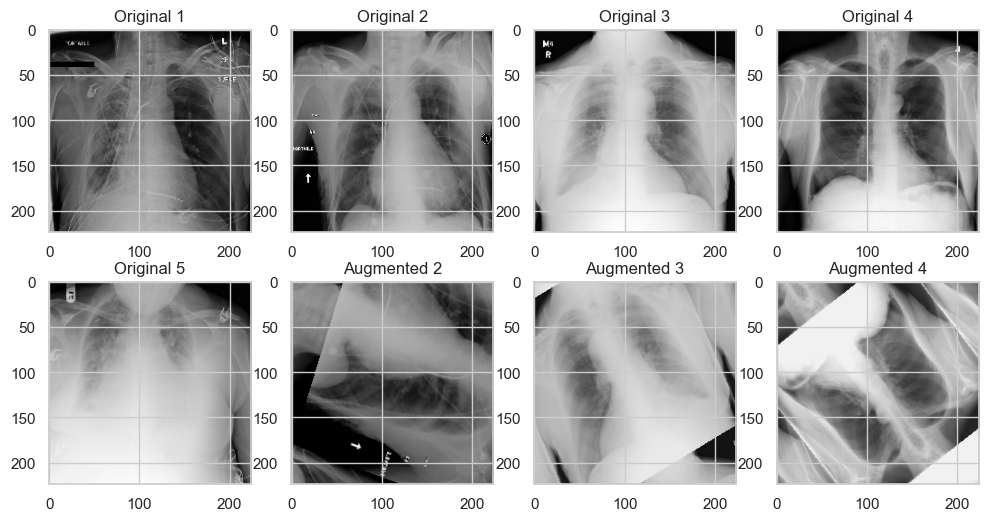

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob

# Assuming 'images' is a list of image paths


# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='wrap',
    channel_shift_range=0.2
)

# Augment and display a subset of images (for faster execution)
num_images = min(len(images), 5)
num_cols = 4  # Number of columns in the grid
num_rows = -(-num_images // num_cols)  # Ceiling division to calculate the number of rows

plt.figure(figsize=(12, 3 * num_rows))

for i, image_path in enumerate(images[:num_images]):
    # Load the original image using TensorFlow
    original_image = image.load_img(image_path, color_mode="grayscale")
    original_image = image.img_to_array(original_image) / 255.0

    # Resize the original image for visualization
    original_image_resized = tf.image.resize(original_image, (224, 224))

    # Convert image to RGB for augmentations
    original_image_rgb = tf.image.grayscale_to_rgb(original_image_resized)

    # Reshape the image to (1, height, width, channels) for the datagen.flow method
    original_image_rgb = tf.expand_dims(original_image_rgb, axis=0)

    # Apply RandAugment transformation
    augmented = datagen.flow(original_image_rgb)
    augmented_image = augmented.next()[0]

    # Display the original and augmented images
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(np.squeeze(original_image_resized), cmap='gray')
    plt.title(f'Original {i + 1}')

    # Use num_cols for indexing augmented images
    plt.subplot(num_rows, num_cols, num_cols + i + 1)
    plt.imshow(np.squeeze(augmented_image), cmap='gray')
    plt.title(f'Augmented {i + 1}')

plt.tight_layout()
plt.show()


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import os
from glob import glob

def preprocess_image_PIL1(image_path, label):
    # Load the image using PIL
    image = Image.open(image_path)

    # Resize the image to 224x224 pixels using LANCZOS interpolation
    image = image.resize((224, 224), resample=Image.LANCZOS)

    # Convert the image to a NumPy array and rescale pixel values to [0, 1]
    image = np.array(image).astype(np.float32) / 255.0

    # If the image is grayscale, add a channel dimension
    if len(image.shape) == 2:
        image = np.expand_dims(image, axis=-1)

    # Create an instance of the ImageDataGenerator class
    datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='wrap',
        channel_shift_range=0.2
    )

    # Reshape the image to (1, height, width, channels) for the datagen.flow method
    image = np.reshape(image, (1, 224, 224, image.shape[-1]))

    # Apply data augmentation
    augmented_images = datagen.flow(image).next()

    # Remove the batch size dimension
    augmented_images = np.squeeze(augmented_images, axis=0)

    return augmented_images, label

# Specify the path to the images
PATH = os.path.abspath(os.path.join('C:/Users/antuh/Documents/Apu_Thesis/Code_File/Data/sample'))
SOURCE_IMAGES = os.path.join(PATH, "sample", "images")
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

# Preprocess the images and labels
preprocessed_images = []
preprocessed_labels = []

# Placeholder for labels (set to None if no labels are available)
labels = [None] * len(images)

# Preprocess the images and labels
for image_path, label in zip(images, labels):
    preprocessed_image, preprocessed_label = preprocess_image_PIL1(image_path, label)
    preprocessed_images.append(preprocessed_image)
    preprocessed_labels.append(preprocessed_label)

# Convert lists to NumPy arrays
preprocessed_images = np.vstack(preprocessed_images)
preprocessed_labels = np.array(preprocessed_labels)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 13 has size 4